In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import cv2
import os

In [28]:
def average_video(filename):
    assert os.path.exists(filename)
    cap = cv2.VideoCapture(filename)
    try:
        sample_period = 2400
        current_frame = 0

        ret, frame = cap.read()
        assert ret, "Reading video file failed"
        frame_sum = np.zeros(frame.shape, dtype=np.float64)
        frames_summed = 0
        total_frames = cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)

        while cap.isOpened() and current_frame < total_frames - sample_period:
            current_frame += sample_period
            cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, current_frame)
            cap.read(frame)
            frame_sum += frame
            frames_summed += 1
    finally:
        cap.release()
        
    return np.array(frame_sum / frames_summed, dtype=np.int8)

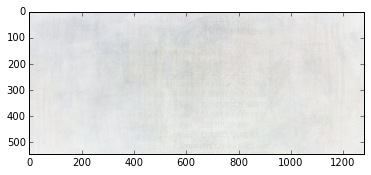

In [36]:
imshow(average_video("/Users/rdeits/Movies/Movies/Star Trek First Contact (1996)/Star.Trek.First.Contact.mp4")
)

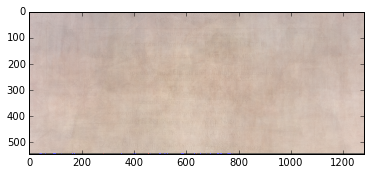

In [14]:
imshow(average_video("/Users/rdeits/Movies/Movies/O Brother, Where Art Thou (2000)/O.Brother.Where.Art.Thou.mp4"))

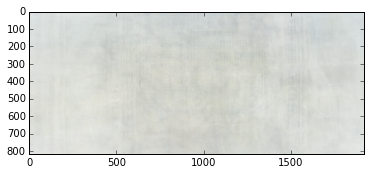

In [37]:
imshow(average_video("/Users/rdeits/Movies/Movies/Star.Wars.IV.A.New.Hope.mp4"))